In [1]:
#@title Version 1 <br>vocab size = 10000 , padding = 1000 <br> testing accuracy around 70%

## first dataset : final_dataset_1.csv

### Connect to drive

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from google.colab import drive
# print('\nimports done\n mounting drive')
drive.mount('/content/drive')

Mounted at /content/drive


text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)


In [3]:
!ls

drive  sample_data


In [4]:
!mkdir dataset
!ls

dataset  drive	sample_data


In [5]:
!cp '/content/drive/MyDrive/datasets/LanguageDataset/final_changes/final_dataset_1.csv' /content/dataset/
! echo copied final_dataset_1

!cp '/content/drive/MyDrive/datasets/LanguageDataset/final_changes/final_dataset_2.csv' /content/dataset/
! echo copied final_dataset_2


copied final_dataset_1
copied final_dataset_2


In [6]:
data = pd.read_csv('/content/dataset/final_dataset_1.csv')
data

,Language,Source
0,bash,"bash\nalias tail_ls=""ls -l $1 | tail""\n\ntail_..."
1,bash,"ERR_COUNT=`echo $VAR_WITH_TEXT | grep ""ERROR t..."
2,bash,SET JARS=^\n./lib/apache-mime4j-0.6.jar;^\n./l...
3,bash,2010-02-20 21:01 1458414588 s3://file1.tgz.0...
4,bash,pkill /?\n\n[ws@RHDev ~]# pkill $(ps aux | gre...
...,...,...
29995,swift,/* Scale and crop image */\nfunc imageByScalin...
29996,swift,import UIKit\nimport MapKit\n\nclass ViewContr...
29997,swift,html\nUIWebView\nParseConfig\nhtml\nParseConfi...
29998,swift,var array1: [AnyObject!] = []\n\n var key...


### Describing Dataset part 1

Text(0.5, 1.0, 'Dataset')

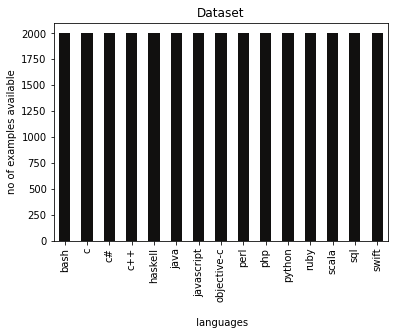

In [7]:
data.groupby('Language')['Source'].count().plot.bar(ylim=0,grid=False,color='#11100f')
plt.xlabel('\n languages')
plt.ylabel('no of examples available')
plt.title('Dataset')

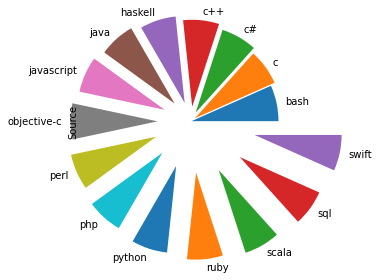

In [8]:
data.groupby('Language')['Source'].count().plot.pie(explode=[0.01+(0.053*i) for i in range(15)] )

### Dataset is not clean 

### PREPROCESSING OF DATASET USING REGULAR EXPRESSION AND NLTK

In [9]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
print('.....done')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
.....done


In [10]:
import re
stopwords_list = stopwords.words('english')
print(len(stopwords_list))

179


In [11]:
stopwords_list.extend(['left','right','up','down','center','centre'])
print(len(stopwords_list))

185


In [12]:
stopwords_list.extend(['bottom','start','end','price','location','fix','here'])
print(len(stopwords_list))


192


In [13]:
def expression1(text):
    # remove single character

    #removing url 
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r'^https?://.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^http?://.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^www?://.*[\r\n]*', '', text, flags=re.MULTILINE)

    text = ' '.join(['' if len(i)==1 else i for i in text.split()])
    
    # text = re.sub('{','',text)
    # text = re.sub('}','',text)
    
    # to remove '(' , ' )' , '[' , ']' ... replaced with a space 
    # text = re.sub('\\(',' ',text)
    # text = re.sub('\\)',' ',text)
    # text = re.sub('\\[',' ',text)
    # text = re.sub('\\]',' ',text)
    # replace . with a space
    # text = re.sub('\\.',' ',text)
    
    # remove unicode
    
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)       
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    
    # remove digits
    text = re.sub('[0-9]',' ',text)
    
    #     remove + - * / < >
    text = re.sub('\\+',' ',text)
    text = re.sub('\\=',' ',text)
    text = re.sub('\\-',' ',text)
    text = re.sub('\\*',' ',text)
    text = re.sub('\\/',' ',text)
    # text = re.sub('\\<',' ',text)
    # text = re.sub('\\>',' ',text)
#     text = re.sub('\\:',' ',text)
    
#     text = text.replace(':',r' : ')
    
    
    #     text = ' '.join(text.split())

    # replace single chars again 
    text = ' '.join(['' if len(i)==1 else i for i in text.split()])
    
    # spacing quoted statement
    text = re.sub('"',' " ',text)
    # replace url

    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
        #Replaces url address with "url" 
    # text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
	  # text = re.sub(r'#([^\s]+)', r'\1',text)

    return text

# def replaceURL(text):

def clean_code(text):
  text = expression1(text)
  text_tokens = word_tokenize(text)
  tokens_without_stopwords = [word for word in text_tokens if not word in stopwords_list] 
  # stopwords.words()]
  return ' '.join(tokens_without_stopwords)

print("TRY expresion1")

TRY expresion1


In [14]:
%%time

line_7210 = data.iloc[15710]['Source']
cleaned_7210 =  clean_code(line_7210)

print(line_7210 , '\n ->',len(line_7210))
print('-'*60,'\n\n')
print(cleaned_7210,'\n ->',len(cleaned_7210))


NSString *url = @"http://stackoverflow.com/questions/ask";

 
 -> 60
------------------------------------------------------------ 


NSString url @ `` 
 -> 17
CPU times: user 10.7 ms, sys: 0 ns, total: 10.7 ms
Wall time: 11.9 ms


### Cleaning dataset

In [15]:
%%time

dataset_refined = data.copy()
print('\n\n->created a copy')
dataset_refined['Source'] =  dataset_refined['Source'].astype(str)
print('\n->as string')
dataset_refined['Source'] =  dataset_refined['Source'].apply(clean_code)
print('\n->cleaned code with expression1')
dataset_refined.to_csv('dataset/cleaned_data_1_v2.csv',index=None)
print('\n->saved cleaned csv , columns : ',dataset_refined.columns)

print('done')



->created a copy

->as string

->cleaned code with expression1

->saved cleaned csv , columns :  Index(['Language', 'Source'], dtype='object')
done
CPU times: user 22.1 s, sys: 23.1 ms, total: 22.2 s
Wall time: 22.2 s


In [16]:
%%time

df = pd.read_csv('/content/dataset/cleaned_data_1_v2.csv')

CPU times: user 116 ms, sys: 16 ms, total: 132 ms
Wall time: 135 ms


In [17]:
df

,Language,Source
0,bash,bash alias tail_ls `` ls tail `` tail_ls etc
1,bash,ERR_COUNT `echo $ VAR_WITH_TEXT grep `` ERROR ...
2,bash,SET JARS lib apache mime .jar ; ^ lib apache m...
3,bash,file .tgz . < br > file .tgz . < br > file .tg...
4,bash,pkill [ ws @ RHDev ~ ] # pkill $ ( ps aux grep...
...,...,...
29995,swift,Scale crop image func imageByScalingAndCroppin...
29996,swift,import UIKit import MapKit class ViewControlle...
29997,swift,html UIWebView ParseConfig html ParseConfig UR...
29998,swift,var array [ AnyObject ! ] [ ] var key `` keySa...


In [18]:
%%time

df["lang_id"] = df['Language'].factorize()[0]
print('>>> lang id created')
lang_id_df = df[['Language', 'lang_id']].drop_duplicates().sort_values('lang_id')
print('>>> added to dataframe')
lang_to_id = dict(lang_id_df.values)
id_to_lang = dict(lang_id_df[['lang_id', 'Language']].values)
print('>>> now columns : ',df.columns)

>>> lang id created
>>> added to dataframe
>>> now columns :  Index(['Language', 'Source', 'lang_id'], dtype='object')
CPU times: user 11 ms, sys: 4 µs, total: 11 ms
Wall time: 11.4 ms


In [19]:
df

,Language,Source,lang_id
0,bash,bash alias tail_ls `` ls tail `` tail_ls etc,0
1,bash,ERR_COUNT `echo $ VAR_WITH_TEXT grep `` ERROR ...,0
2,bash,SET JARS lib apache mime .jar ; ^ lib apache m...,0
3,bash,file .tgz . < br > file .tgz . < br > file .tg...,0
4,bash,pkill [ ws @ RHDev ~ ] # pkill $ ( ps aux grep...,0
...,...,...,...
29995,swift,Scale crop image func imageByScalingAndCroppin...,14
29996,swift,import UIKit import MapKit class ViewControlle...,14
29997,swift,html UIWebView ParseConfig html ParseConfig UR...,14
29998,swift,var array [ AnyObject ! ] [ ] var key `` keySa...,14


### Training test split

In [20]:
mask = np.random.rand(len(data)) > 0.19
print('mask created',type(mask))

mask created <class 'numpy.ndarray'>


In [21]:
data_1 = df[mask]
data_2 = df[~mask]
print('created two halves')
print('1st -->',len(data_1) , '\n 2nd-->', len(data_2))

created two halves
1st --> 24252 
 2nd--> 5748


Text(0.5, 1.0, 'Dataset_part_1 - FOR TRAINING')

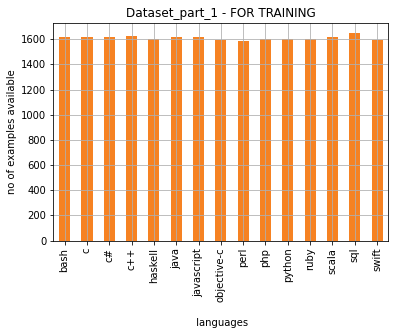

In [22]:
data_1.groupby('Language')['Source'].count().plot.bar(ylim=0,grid=True,color='#f68222')
plt.xlabel('\n languages')
plt.ylabel('no of examples available')
plt.title('Dataset_part_1 - FOR TRAINING')

Text(0.5, 1.0, 'Dataset_part_2 - FOR TESTING')

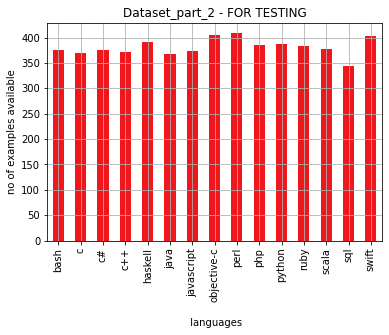

In [23]:
data_2.groupby('Language')['Source'].count().plot.bar(ylim=0,grid=True,color='#f0171c')
plt.xlabel('\n languages')
plt.ylabel('no of examples available')
plt.title('Dataset_part_2 - FOR TESTING')

In [24]:
import tensorflow as tf

### Tokenizing

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:

vocab_size = 10000
trunc_type='post'
oov_tok = "<OOV>"


In [27]:

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
print('Tokenizer created')


Tokenizer created


In [28]:
print('fitting on training sentences\n.\n.')

tokenizer.fit_on_texts(data_1['Source'].values.astype('U'))

print('.\n.\n.\nfitted on training sentences')

fitting on training sentences
.
.
.
.
.
fitted on training sentences


In [29]:
word_index = tokenizer.word_index
print('len of word index',len(word_index))

len of word index 79790


In [31]:
# %%time

# import pickle

# # saving
# with open('tokenizer_model1_run2.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
# print('saved')
%%time

import pickle

# saving
with open('tokenizer_Jan5_model2.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print('saved')

saved
CPU times: user 60.5 ms, sys: 13 ms, total: 73.5 ms
Wall time: 73.1 ms


## copy to drive

In [32]:
!cp '/content/tokenizer_Jan5_model2.pickle' '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models'
!echo done

done


#### Convert training sentences to sequences

In [33]:
max_length = 1000
trunc_type='post'

In [34]:
%%time
print('converting training data')
X_train = tokenizer.texts_to_sequences(data_1['Source'].values.astype('U'))
print(' .... converted text to sequences' , type(X_train),'\n ')
print('-'*70)

X_train_padded = pad_sequences(X_train,maxlen=max_length, truncating=trunc_type)

print('sequence padded to ',X_train_padded.shape)

converting training data
 .... converted text to sequences <class 'list'> 
 
----------------------------------------------------------------------
sequence padded to  (24252, 1000)
CPU times: user 4.5 s, sys: 448 ms, total: 4.95 s
Wall time: 4.95 s


### Converting testing sentences to sequenes

In [35]:
%%time

X_test = tokenizer.texts_to_sequences(data_2['Source'].values.astype('U'))
print('..converted text to sequences' , type(X_test),'\n ')
print('-'*70)
X_test_padded = pad_sequences(X_test,maxlen=max_length, truncating=trunc_type)
print('sequence padded to ',X_test_padded.shape)

..converted text to sequences <class 'list'> 
 
----------------------------------------------------------------------
sequence padded to  (5748, 1000)
CPU times: user 595 ms, sys: 10.9 ms, total: 606 ms
Wall time: 606 ms


## Preparing labels

### Training labels

In [36]:
Y_train = pd.get_dummies(data_1['Language'].values.astype('U'))
print('and Y : ',type(Y_train))
y_train = np.asarray(Y_train)
print(X_train_padded.shape , y_train.shape)

and Y :  <class 'pandas.core.frame.DataFrame'>
(24252, 1000) (24252, 15)


### Testing labels

In [37]:
Y_test = pd.get_dummies(data_2['Language'].values.astype('U'))
print('and Y : ',type(Y_test))
y_test = np.asarray(Y_test)
print(X_test_padded.shape , y_test.shape)

and Y :  <class 'pandas.core.frame.DataFrame'>
(5748, 1000) (5748, 15)


### Creating the model

In [38]:
my_model4 = tf.keras.models.Sequential()
print('model created now add layers')

model created now add layers


In [39]:
# my_model.add(tf.keras.layers.Input(input_shape=2215))
my_model4.add(tf.keras.layers.InputLayer(input_shape=max_length,dtype=tf.int32))
print('\n --> added input layer with max sequence max_features = ',max_length)
my_model4.summary()
# print('added input layer')


 --> added input layer with max sequence max_features =  1000
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [40]:
t = len(tokenizer.word_index)
t , t**(0.25)

(79790, 16.80688065864203)

### embedding dim 32

In [41]:
embed_dim = 32

In [42]:
my_model4.add(tf.keras.layers.Embedding(vocab_size, embed_dim,input_length = max_length))
print('\n-->added embedding layer with vocab size = ',vocab_size,'embed dim = ',embed_dim,'\n')
my_model4.summary()


-->added embedding layer with vocab size =  10000 embed dim =  32 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          320000    
Total params: 320,000
Trainable params: 320,000
Non-trainable params: 0
_________________________________________________________________


In [43]:
# model.add(Conv1D(filters=128, kernel_size=3, padding='same', dilation_rate=1,activation='relu'))
my_model4.add(tf.keras.layers.Conv1D(128 , 5, padding='valid',kernel_initializer='random_normal'))
print('.\n.\n.\n-->added conv1d layer with 128 filters size = 3, valid padding  ,random_normal initializer')
my_model4.add(tf.keras.layers.MaxPool1D(pool_size=5))
print('added pool layer')
my_model4.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model4.add(tf.keras.layers.Activation('relu'))
print('added relu activation layer')
my_model4.summary()

.
.
.
-->added conv1d layer with 128 filters size = 3, valid padding  ,random_normal initializer
added pool layer
added batch norm layer
added relu activation layer
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 996, 128)          20608     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 199, 128)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 199, 128)          512       
_________________________________________________________________
activation (Activation)      (None, 199, 128)          0         
Total params: 341,120
Trainable params: 340,864
Non-trainable params: 256
_______________

In [44]:
# #  tf.keras.layers.GlobalAveragePooling1D(),
my_model4.add(tf.keras.layers.GlobalAveragePooling1D())
print('added global average poolinglayer')
my_model4.summary()
# my_model3.summary()


added global average poolinglayer
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 996, 128)          20608     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 199, 128)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 199, 128)          512       
_________________________________________________________________
activation (Activation)      (None, 199, 128)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
Total params: 341,120
Trainable params: 340,864
Non-trainable params: 256
______________

In [45]:
my_model4.add(tf.keras.layers.Dropout(0.5))
print('.\n.\n.\n--> added a 0.5 dropout layer')
my_model4.add(tf.keras.layers.Dense(64,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-7, l2=1e-5)))
print('.\n.\n.\n--> added a dense layer with l1_l2 regularization')
my_model4.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model4.add(tf.keras.layers.Activation('tanh'))
print('added tanh activation layer')
my_model4.add(tf.keras.layers.Flatten())
print('.\n.\n.\n--> flatten layer')
my_model4.summary()

.
.
.
--> added a 0.5 dropout layer
.
.
.
--> added a dense layer with l1_l2 regularization
added batch norm layer
added tanh activation layer
.
.
.
--> flatten layer
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 996, 128)          20608     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 199, 128)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 199, 128)          512       
_________________________________________________________________
activation (Activation)      (None, 199, 128)          0         
_________________________________________________________________
global_average_poolin

In [46]:
# my_model.add(tf.keras.layers.Dense(16))
# print('.\n.\n.\n--> added a dense layer with ')
# my_model.add(tf.keras.layers.BatchNormalization())
# print('added batch norm layer')
# my_model.add(tf.keras.layers.Activation('sigmoid'))
# print('added sigmoid activation layer')
# my_model.add(tf.keras.layers.Flatten())
# print('.\n.\n.\n--> flatten layer')

In [47]:
num_classes = 15


my_model4.add(tf.keras.layers.Dense(num_classes))
print('--> dense layer of size =  ',num_classes)
my_model4.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model4.add(tf.keras.layers.Activation('sigmoid'))
print('added sigmoid activation layer')
my_model4.add(tf.keras.layers.Flatten())
print('.\n.\n.\n--> flatten layer')
my_model4.add(tf.keras.layers.Activation('softmax'))
print('added final softmax activation layer')

my_model4.summary()

--> dense layer of size =   15
added batch norm layer
added sigmoid activation layer
.
.
.
--> flatten layer
added final softmax activation layer
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 996, 128)          20608     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 199, 128)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 199, 128)          512       
_________________________________________________________________
activation (Activation)      (None, 199, 128)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)  

### Model created

In [48]:
my_model4.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',), loss='categorical_crossentropy', metrics=['accuracy'])
print('--->compiled with learning rate : 0.00001 -')

--->compiled with learning rate : 0.00001 -


### model compiled

### Now training the model

### using k fold cross validation

In [49]:
from sklearn.model_selection import KFold

# n_fold = 2
# n_fold = 3 
# n_fold = 5
n_fold = 10

k_fold = KFold(n_fold,shuffle=True,random_state=14)

In [50]:
k_fold


KFold(n_splits=10, random_state=14, shuffle=True)

In [51]:
%%time

scores = []
histories = []
print('......... fitting the model\n')

for train_iX,test_iX in k_fold.split(X_train_padded):
  # selecting rows for trainX and trainY first train data and then cross validation data
  x_itrain,y_itrain,x_cv,y_cv = X_train_padded[train_iX] , y_train[train_iX] , X_train_padded[test_iX], y_train[test_iX]
    # fit into model with batch sizes of 32 and epochs 10
    # # history = my_model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_cv,y_cv))
  history = my_model4.fit(x_itrain,y_itrain,batch_size=64,epochs=10,verbose=1,validation_data=(x_cv,y_cv))
  # evaluate model
  loss,acc = my_model4.evaluate(X_test_padded , y_test,verbose=2)
  print('-'*80)
  print('\n\t --> accuracy on test data : {:.6f}% and loss : {:.7f} <--\n'.format(acc * 100.0,loss))
  print('-'*80)
    # # stores scores  
  scores.append(acc)
  histories.append(history)

print('done')

......... fitting the model

Epoch 1/10
342/342 [==============================] - 16s 24ms/step - loss: 2.7244 - accuracy: 0.0660 - val_loss: 2.7096 - val_accuracy: 0.0676
Epoch 2/10
342/342 [==============================] - 7s 21ms/step - loss: 2.7185 - accuracy: 0.0701 - val_loss: 2.7012 - val_accuracy: 0.0890
Epoch 3/10
342/342 [==============================] - 7s 22ms/step - loss: 2.7162 - accuracy: 0.0718 - val_loss: 2.6931 - val_accuracy: 0.1002
Epoch 4/10
342/342 [==============================] - 7s 19ms/step - loss: 2.7064 - accuracy: 0.0805 - val_loss: 2.6864 - val_accuracy: 0.1331
Epoch 5/10
342/342 [==============================] - 8s 22ms/step - loss: 2.7025 - accuracy: 0.0829 - val_loss: 2.6792 - val_accuracy: 0.1505
Epoch 6/10
342/342 [==============================] - 8s 22ms/step - loss: 2.6956 - accuracy: 0.0929 - val_loss: 2.6713 - val_accuracy: 0.1645
Epoch 7/10
342/342 [==============================] - 7s 22ms/step - loss: 2.6896 - accuracy: 0.0906 - val_loss:

### save model for later use

In [52]:
print('saving model...')
my_model4.save('content/Jan5_model2')
print('saved')

saving model...
INFO:tensorflow:Assets written to: content/Jan5_model2/assets
saved


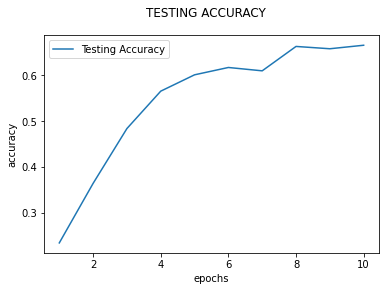

In [53]:
plt.plot([i for i in range(1,len(scores)+1)] , scores,label='Testing Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.suptitle('TESTING ACCURACY')
plt.legend()

In [54]:
!zip -r /content/Jan5_model2.zip /content/content/Jan5_model2

  adding: content/content/Jan5_model2/ (stored 0%)
  adding: content/content/Jan5_model2/saved_model.pb (deflated 89%)
  adding: content/content/Jan5_model2/assets/ (stored 0%)
  adding: content/content/Jan5_model2/variables/ (stored 0%)
  adding: content/content/Jan5_model2/variables/variables.index (deflated 68%)
  adding: content/content/Jan5_model2/variables/variables.data-00000-of-00001 (deflated 7%)


In [55]:
!cp '/content/Jan5_model2.zip' '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models'
!echo copied to drive

copied to drive


#### Training curve

In [56]:
acc = []
for i in range(10):
  acc.extend(histories[i].history['accuracy'])
print(len(acc))

100


In [58]:
val_acc = []
for i in range(10):
  val_acc.extend(histories[i].history['val_accuracy'])
print(len(acc))

100


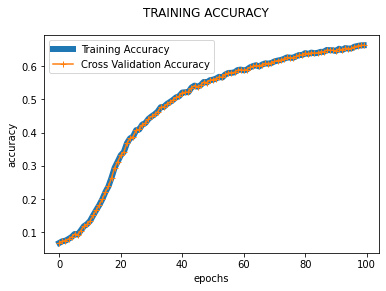

In [67]:

plt.plot([i for i in range(0,len(acc))] ,acc,label='Training Accuracy',linewidth=6)
plt.plot([i for i in range(0,len(val_acc))] ,acc,label='Cross Validation Accuracy',marker='+')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.suptitle('TRAINING ACCURACY')
plt.legend()

### Confusion Matrix

In [68]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

## Testing Data

In [69]:
%%time
predictions_1 = my_model4.predict(X_test_padded)
print('done predicting on test data')
print(type(predictions_1))


done predicting on test data
<class 'numpy.ndarray'>
CPU times: user 473 ms, sys: 44.3 ms, total: 517 ms
Wall time: 507 ms


In [70]:
predictions_1.shape , y_test.shape

((5748, 15), (5748, 15))

In [71]:
first_preds = np.argmax(predictions_1,axis=1)
first_preds.shape

(5748,)

In [72]:
actual_pred = np.argmax(y_test,axis=1)
actual_pred.shape # use these argmax values for confusion matrix

(5748,)

In [73]:
print('\n','-'*50,'\n')
cnf_matrix1 = confusion_matrix(actual_pred, first_preds)
print(cnf_matrix1)


 -------------------------------------------------- 

[[265   4  13  25   2   7   7  12   9   9   8   7   0   7   2]
 [  7 212  11 103   5   0   3  13   3   1   6   3   3   2   3]
 [  1   0 270  33   3  23   9   3   1   2   6   5   1  16   4]
 [  2  19  32 275   6   4   7  11   3   0   5   1   3   2   3]
 [  4   6   9  46 279   2   5   2   0   1  12   7   6   4  10]
 [  6   1 135  41   5 134   7  11   2   1   7   5   2  13   2]
 [  0   0  13  18   3   3 276   8   3   4   3  11   1  11  20]
 [  1   4  13  21   4   2   2 337   0   1   6   5   0   4   7]
 [ 23   1  19  38   8   9   8   9 212   9  31  18   6  14   4]
 [ 24   3  24  27   6   7  56   4   3 173  13  19   0  29   1]
 [  8   3  14  28   5  11   6  12  11   2 245  18  17   6   2]
 [ 16   2  21  21  11  12  11  11   5   1  14 239  14   9   0]
 [  2   0   8  24   6   9   2   3   0   0   8   6 303   1   7]
 [  2   0  19  11   2   3   4   1   2   7   6   6   1 276   5]
 [  0   3   6   9   0   2   2  45   0   0   6   1   0   1 328]]

In [74]:
class_names = df['Language'].unique()
class_names

array(['bash', 'c', 'c#', 'c++', 'haskell', 'java', 'javascript',
       'objective-c', 'perl', 'php', 'python', 'ruby', 'scala', 'sql',
       'swift'], dtype=object)

In [75]:
import seaborn as sns

### Better confusion martrix display
##### source : https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

In [76]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

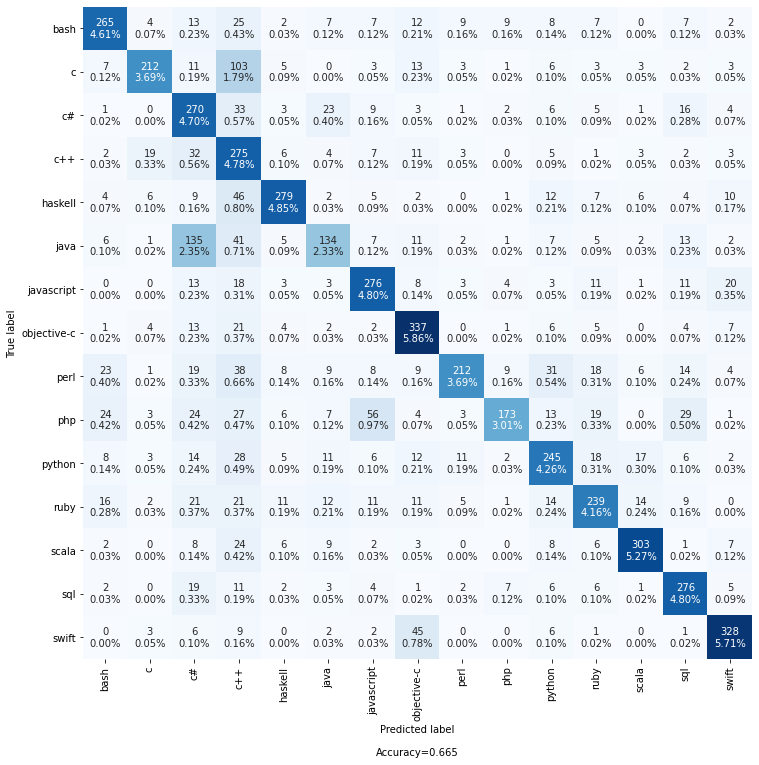

In [77]:
# make_confusion_matrix(cnf_matrix, figsize=(12,12), cbar=False )
make_confusion_matrix(cnf_matrix1, figsize=(12,12), cbar=False ,categories=class_names)


#### Precision , Recall and F1 Score

In [81]:
from sklearn.metrics import precision_recall_fscore_support as score
langs = [i for i in data.Language.unique()]
langs.sort()
langs

['bash',
 'c',
 'c#',
 'c++',
 'haskell',
 'java',
 'javascript',
 'objective-c',
 'perl',
 'php',
 'python',
 'ruby',
 'scala',
 'sql',
 'swift']

In [82]:
def print_metrics(predictions):
  precision , recall , fscore , support = score( actual_pred, predictions)
  print('-'*80)
  print('{:10}\t | {:7}\t |  {:12}|\t{}'.format('   Language','  Precision',' Recall',' F1 Measure'))
  print('-'*80)
  for i in range(len(langs)):
    
    result = '{:10}\t |{:13.5}\t |{:10.5}\t|\t{:10.5}'.format(str('   '+langs[i]),precision[i],recall[i],fscore[i])
    print(result,end='\n')
    print('-'*80)


In [83]:
print_metrics(first_preds)


--------------------------------------------------------------------------------
   Language	 |   Precision	 |   Recall     |	 F1 Measure
--------------------------------------------------------------------------------
   bash   	 |      0.73407	 |   0.70292	|	   0.71816
--------------------------------------------------------------------------------
   c      	 |      0.82171	 |   0.56533	|	   0.66983
--------------------------------------------------------------------------------
   c#     	 |      0.44481	 |   0.71618	|	   0.54878
--------------------------------------------------------------------------------
   c++    	 |      0.38194	 |   0.73727	|	    0.5032
--------------------------------------------------------------------------------
   haskell	 |       0.8087	 |   0.70992	|	    0.7561
--------------------------------------------------------------------------------
   java   	 |      0.58772	 |   0.36022	|	   0.44667
----------------------------------------------------------

### creating another for just testing something

In [ ]:
my_model5 = tf.keras.models.Sequential()
print('model created now add layers')

model created now add layers


In [ ]:
# my_model.add(tf.keras.layers.Input(input_shape=2215))
my_model5.add(tf.keras.layers.InputLayer(input_shape=max_length,dtype=tf.int32))
print('----> added input layer with max sequence max_features = ',max_length)
my_model5.summary()
# print('added input layer')

----> added input layer with max sequence max_features =  1000
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model5.add(tf.keras.layers.Embedding(vocab_size, embed_dim,input_length = max_length))
print('\n-->added embedding layer with vocab size = ',vocab_size,'embed dim = ',embed_dim)
my_model5.summary()


-->added embedding layer with vocab size =  10000 embed dim =  32
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          320000    
Total params: 320,000
Trainable params: 320,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.add(Conv1D(filters=128, kernel_size=3, padding='same', dilation_rate=1,activation='relu'))
my_model5.add(tf.keras.layers.Conv1D(128 , 5, padding='same',kernel_initializer='random_normal'))
print('.\n.\n.\nadded conv1d layer with valid padding random_normal initializer - 128 filters')
my_model5.add(tf.keras.layers.MaxPool1D(pool_size=5))
print('added pool layer')
my_model5.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model5.add(tf.keras.layers.Activation('relu'))
print('added relu activation layer')
my_model5.summary()


.
.
.
added conv1d layer with valid padding random_normal initializer - 128 filters
added pool layer
added batch norm layer
added relu activation layer
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1000, 128)         20608     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 200, 128)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 200, 128)          512       
_________________________________________________________________
activation_4 (Activation)    (None, 200, 128)          0         
Total params: 341,120
Trainable params: 340,864
Non-trainable params: 256
__________________________

In [ ]:
# model.add(Conv1D(filters=128, kernel_size=3, padding='same', dilation_rate=1,activation='relu'))
my_model5.add(tf.keras.layers.Conv1D(64 , 5, padding='same',kernel_initializer='random_normal'))
print('.\n.\n.\nadded conv1d layer with valid padding random_normal initializer - 128 filters')
my_model5.add(tf.keras.layers.MaxPool1D(pool_size=5))
print('added pool layer')
my_model5.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model5.add(tf.keras.layers.Activation('relu'))
print('added relu activation layer')
my_model5.summary()


.
.
.
added conv1d layer with valid padding random_normal initializer - 128 filters
added pool layer
added batch norm layer
added relu activation layer
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1000, 128)         20608     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 200, 128)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 200, 128)          512       
_________________________________________________________________
activation_4 (Activation)    (None, 200, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None

In [ ]:
my_model5.add(tf.keras.layers.Dense(200,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-7, l2=1e-5)))
print('.\n.\n.\n--> added a dense layer with l1_l2 regularization')
my_model5.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model5.add(tf.keras.layers.Activation('tanh'))
print('added tanh activation layer')
my_model5.add(tf.keras.layers.Flatten())
print('.\n.\n.\n--> flatten layer')
my_model5.add(tf.keras.layers.Dropout(0.5))
print('.\n.\n.\n--> added a 0.5 dropout layer')
my_model5.summary()

.
.
.
--> added a dense layer with l1_l2 regularization
added batch norm layer
added tanh activation layer
.
.
.
--> flatten layer
.
.
.
--> added a 0.5 dropout layer
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1000, 128)         20608     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 200, 128)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 200, 128)          512       
_________________________________________________________________
activation_4 (Activation)    (None, 200, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)  

In [ ]:
my_model5.add(tf.keras.layers.Dense(64,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-6, l2=1e-5)))
print('.\n.\n.\n--> added another dense layer with l1_l2 regularization')
my_model5.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model5.add(tf.keras.layers.Activation('sigmoid'))
print('added tanh sigmoid layer')
my_model5.add(tf.keras.layers.Flatten())
print('.\n.\n.\n--> flatten layer')
my_model5.summary()

.
.
.
--> added another dense layer with l1_l2 regularization
added batch norm layer
added tanh sigmoid layer
.
.
.
--> flatten layer
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1000, 128)         20608     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 200, 128)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 200, 128)          512       
_________________________________________________________________
activation_4 (Activation)    (None, 200, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 200, 64)        

In [ ]:
num_classes

15

In [ ]:
my_model5.add(tf.keras.layers.Dense(num_classes))
print('--> dense layer of size =  ',num_classes)
my_model5.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model5.add(tf.keras.layers.Activation('sigmoid'))
print('added sigmoid activation layer')
my_model5.add(tf.keras.layers.Flatten())
print('.\n.\n.\n--> flatten layer')
my_model5.add(tf.keras.layers.Activation('softmax'))
print('added final softmax activation layer')
my_model5.summary()

--> dense layer of size =   15
added batch norm layer
added sigmoid activation layer
.
.
.
--> flatten layer
added final softmax activation layer
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1000, 128)         20608     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 200, 128)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 200, 128)          512       
_________________________________________________________________
activation_4 (Activation)    (None, 200, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 200,

In [ ]:
my_model5.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',), loss='categorical_crossentropy', metrics=['accuracy'])
print(' ---> compiled with learning rate : 0.00001 -')

 ---> compiled with learning rate : 0.00001 -


In [ ]:
%%time

scores2 = []
histories2 = []
print('------> fitting the model\n')

for train_iX,test_iX in k_fold.split(X_train_padded):
  # selecting rows for trainX and trainY first train data and then cross validation data
  x_itrain,y_itrain,x_cv,y_cv = X_train_padded[train_iX] , y_train[train_iX] , X_train_padded[test_iX], y_train[test_iX]
    # fit into model with batch sizes of 32 and epochs 10
    # # history = my_model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_cv,y_cv))
  history = my_model5.fit(x_itrain,y_itrain,batch_size=128,epochs=10,verbose=1,validation_data=(x_cv,y_cv))
  # evaluate model
  loss,acc = my_model5.evaluate(X_test_padded , y_test,verbose=2)
  print('-'*80)
  print('\n\t --> accuracy on test data : {:.6f}% and loss : {:.7f} <--\n'.format(acc * 100.0,loss))
  print('-'*80)
    # # stores scores  
  scores2.append(acc)
  histories2.append(history)

print('done')

------> fitting the model

Epoch 1/10
171/171 [==============================] - 7s 32ms/step - loss: 2.7352 - accuracy: 0.0694 - val_loss: 2.7202 - val_accuracy: 0.0639
Epoch 2/10
171/171 [==============================] - 5s 30ms/step - loss: 2.7245 - accuracy: 0.0742 - val_loss: 2.7164 - val_accuracy: 0.0692
Epoch 3/10
171/171 [==============================] - 5s 30ms/step - loss: 2.7160 - accuracy: 0.0793 - val_loss: 2.7106 - val_accuracy: 0.0874
Epoch 4/10
171/171 [==============================] - 5s 30ms/step - loss: 2.7091 - accuracy: 0.0834 - val_loss: 2.7042 - val_accuracy: 0.0989
Epoch 5/10
171/171 [==============================] - 5s 29ms/step - loss: 2.7020 - accuracy: 0.0837 - val_loss: 2.6970 - val_accuracy: 0.0997
Epoch 6/10
171/171 [==============================] - 5s 29ms/step - loss: 2.6950 - accuracy: 0.0943 - val_loss: 2.6896 - val_accuracy: 0.1071
Epoch 7/10
171/171 [==============================] - 5s 29ms/step - loss: 2.6873 - accuracy: 0.0962 - val_loss: 2.

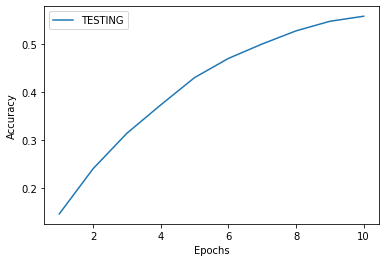

In [ ]:
plt.plot([i for i in range(1,11)],scores2,label='TESTING')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()